In [74]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.0/390.3 MB 5.0 MB/s eta 0:01:18
   ---------------------------------------- 1.3/390.3 MB 5.6 MB/s eta 0:01:10
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 28] No space left on device



In [15]:
!pip install --upgrade matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [61]:
import tensorflow as tf
from tensorflow.keras  import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [16]:
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",
                                                    shuffle = True,
                                                   image_size= (IMAGE_SIZE,IMAGE_SIZE),
                                                   batch_size =BATCH_SIZE)

Found 2150 files belonging to 3 classes.


In [17]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

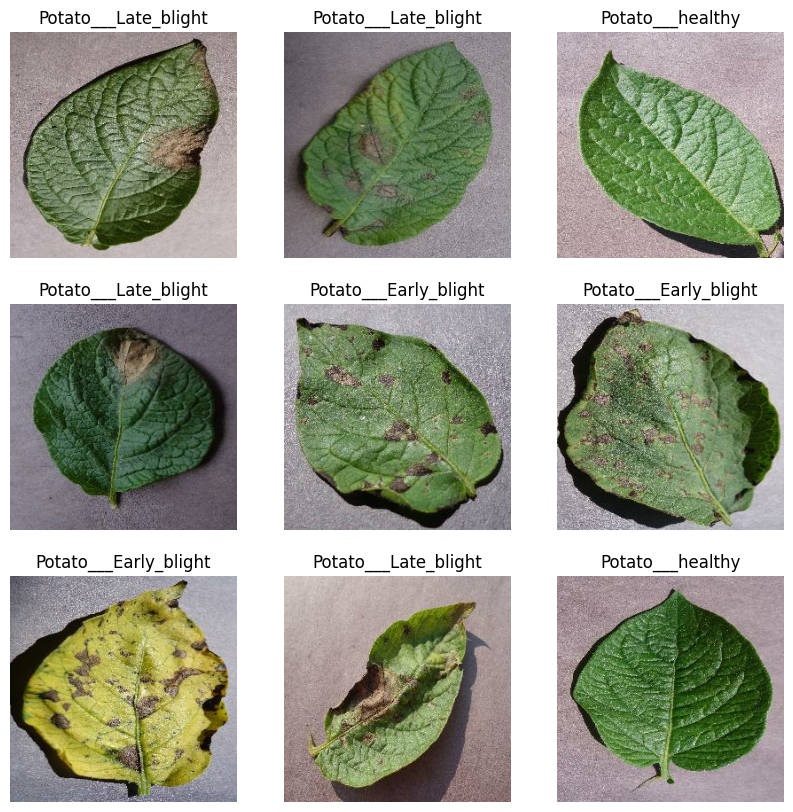

In [18]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i +1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [19]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size= 10000):
    dataset_size = len(ds)
    if shuffle:
       ds=  ds.shuffle(shuffle_size,seed = 12)
    train_size = int(dataset_size *  train_split)
    val_size = int(dataset_size * val_split)
    train_ds= ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds
    
    
        
        
            

In [20]:
train_ds, val_ds, test_ds =get_dataset_partitions_tf(dataset)
print(len(train_ds),len(val_ds),len(test_ds))

54 6 8


In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [24]:
data_augmention = tf.keras.Sequential([
    layers.RandomFlip("horizonatl_and_vertical"),
    layers.RandomRotation(0.2),
])

In [26]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS )
n_classes = 3

In [34]:

model = models.Sequential([
    resize_and_rescale,
    data_augmention,
    layers.Conv2D(32,(3,3), activation= 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation =  'softmax'),
])
model.build(input_shape = input_shape)

In [36]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_2 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
    metrics = ['accuracy']
)

In [38]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 846ms/step - accuracy: 0.4988 - loss: 0.9089 - val_accuracy: 0.6823 - val_loss: 0.6912
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 561ms/step - accuracy: 0.7353 - loss: 0.5851 - val_accuracy: 0.8333 - val_loss: 0.3494
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 622ms/step - accuracy: 0.8153 - loss: 0.4269 - val_accuracy: 0.8802 - val_loss: 0.2937
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 723ms/step - accuracy: 0.8650 - loss: 0.3234 - val_accuracy: 0.9844 - val_loss: 0.0709
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 604ms/step - accuracy: 0.9262 - loss: 0.1718 - val_accuracy: 0.9635 - val_loss: 0.1049
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 624ms/step - accuracy: 0.9638 - loss: 0.0961 - val_accuracy: 0.9010 - val_loss: 0.2097
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 39s 734ms/step - accuracy: 0.9560 - loss: 0.1074 - val_accuracy: 0.9740 - val_loss: 0.0621
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 38s 706ms/step - accuracy: 0.9756 - loss: 0.0720 - val_accu

In [41]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 239ms/step - accuracy: 0.9882 - loss: 0.0165


In [42]:
scores

[0.015645330771803856, 0.9921875]

In [45]:
his = history.history
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [46]:
accuracy = his['accuracy']
loss = his['loss']
val_accuracy = his['val_accuracy']
val_loss = his['val_loss']

Text(0.5, 1.0, 'Training and validation Accuracy')

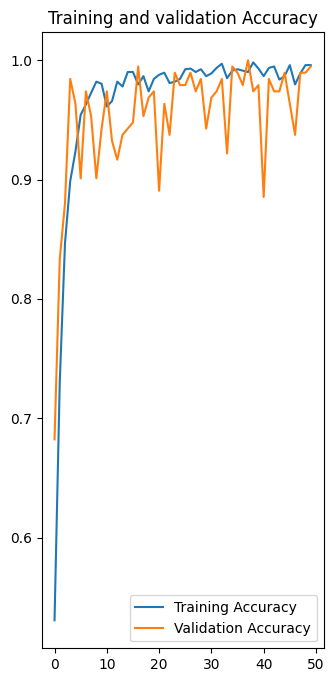

In [50]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accuracy,label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation Accuracy')

first image to predict
actual label Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted label Potato___Late_blight


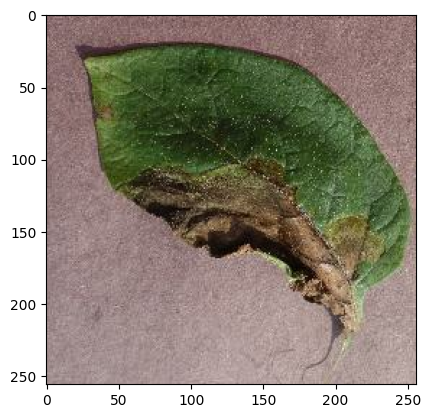

In [75]:

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[1].numpy().astype('uint8')
    first_label = label_batch[1].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label " + class_names[first_label] )
    batch_prediction = model.predict(images_batch)
    print("predicted label " + class_names[np.argmax(batch_prediction[1])])
    
  

In [81]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) 
    prediction = model.predict(img_array)
    prediction_class = class_names[np.argmax(prediction[0])]
    confidence = round(100 *(np.max(prediction[0])),2)
    return prediction_class, confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


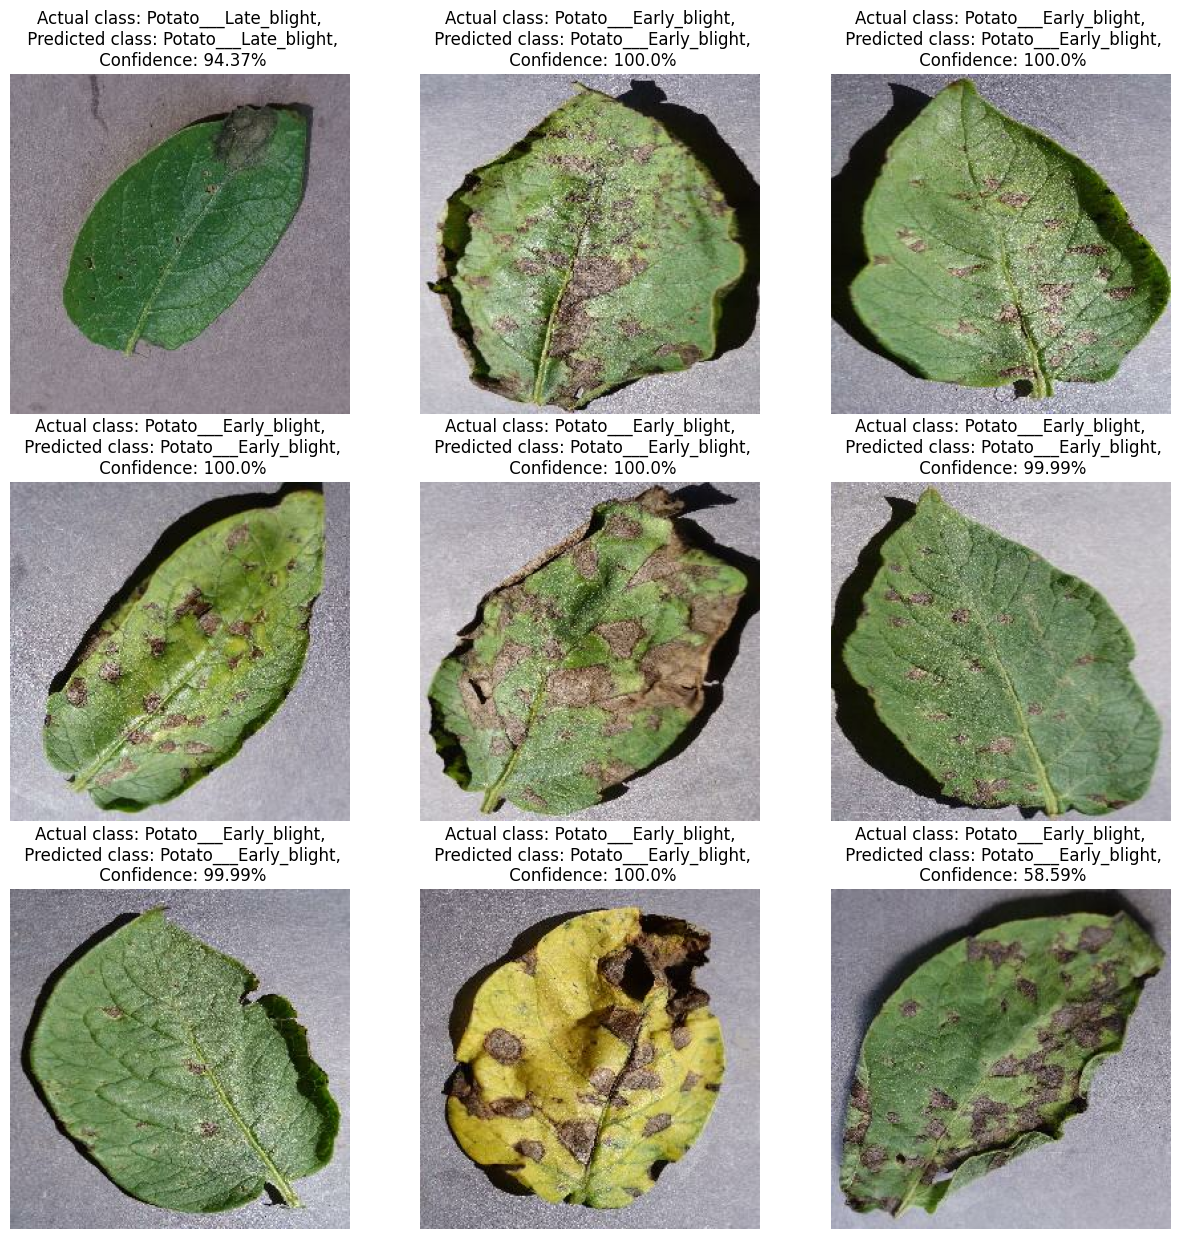

In [87]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual class: {actual_class},\n Predicted class: {predicted_class},\n Confidence: {confidence}%")
        plt.axis('off')

In [92]:
model_version = 1
model.save(f"../models/{model_version}/model.keras")

In [8]:
!pip install --upgrade tensorflow keras


In [9]:
import tensorflow as tf

# Load your existing Keras model
# Example of loading a model with custom objects
model = tf.keras.models.load_model(
    "C:/Users/berek/Documents/Data_science_project/potato_classifier/models/1/model.keras",
    custom_objects={"CustomLayer": CustomLayerClass}  # replace with your custom classes
)


# Save the model in TensorFlow SavedModel format
save_path = "C:/Users/berek/Documents/Data_science_project/potato_classifier/models/2"
tf.saved_model.save(model, save_path)

print("Model saved in TensorFlow SavedModel format successfully!")



TypeError: this __dict__ descriptor does not support '_DictWrapper' objects